In [1]:
import numpy as np
import torch
import torchvision.transforms as transforms
from modules.vgg import vgg16
from modules.resnet import resnet50
from util import *
import render
from util import *
import matplotlib.pyplot as plt

def torch_to_image(tensor, mean=0, std=1):
    """
    Helper function to convert torch tensor containing input data into image.
    """
    if len(tensor.shape) == 4:
        img = tensor.permute(0, 2, 3, 1)

    img = img.contiguous().squeeze().detach().cpu().numpy()

    img = img * std.reshape(1, 1, 3) + mean.reshape(1, 1, 3)
    return np.clip(img, 0, 1)        


/home/sangyu/anaconda3/envs/SRD/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sangyu/anaconda3/envs/SRD/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
batch_size = 1

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])

In [3]:
model_org = vgg16(pretrained=True,name='vgg16').to(device)
model_org = model_org.eval()
infer_pkg = InferencePkg()
infer_pkg.device = device

In [4]:
img = 'imagenet/images/16.JPEG'
data_mean = np.array([0.485, 0.456, 0.406])
data_std = np.array([0.229, 0.224, 0.225])
x = load_image(data_mean, data_std, device, img)
x = x.to(device)

/home/sangyu/anaconda3/envs/SRD/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


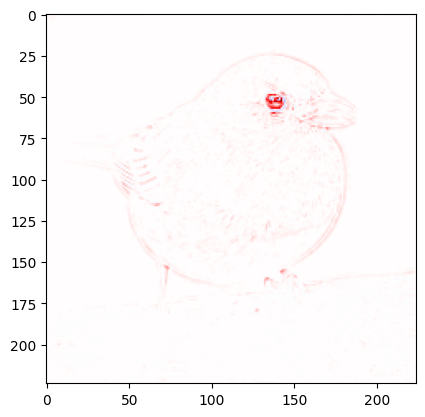

In [5]:
_ = model_org(x,infer_pkg)
y = torch.zeros_like(_)
idx = 13
simmap = model_org.get_pixel_cont(x,idx,infer_pkg,lambda x:x).squeeze().detach().cpu()
out = render.hm_to_rgb(simmap.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)

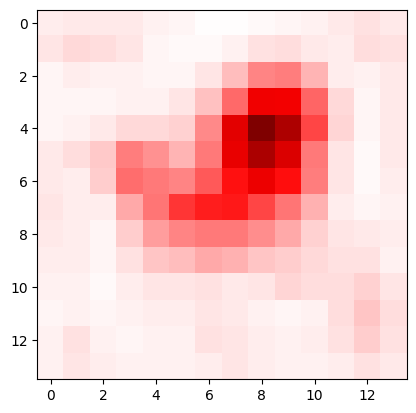

In [6]:
# visualize hidden layer sharing ratio
simmap = infer_pkg.simmaps['vgg16.features.27']
out = render.hm_to_rgb(simmap.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)

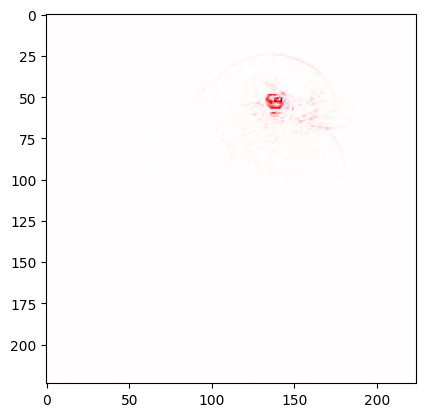

In [12]:
# show ERF
extern_simmap = torch.zeros_like(infer_pkg.simmaps['vgg16.features.27']).to(device)
extern_simmap[0,4,8] = 1
target_layer_name = 'vgg16.features.27'
erf = model_org.get_ERF(x,extern_simmap,infer_pkg,target_layer_name=target_layer_name)
out = render.hm_to_rgb(erf.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)
plt.imsave('ERF_(2,5).png',out)

In [13]:
# Case of two classes in one image
infer_pkg = InferencePkg()
infer_pkg.device = device
#x,y = next(iter(val_loader))
img = 'imagenet/images/1.jpg'
data_mean = np.array([0.485, 0.456, 0.406])
data_std = np.array([0.229, 0.224, 0.225])
x = load_image(data_mean, data_std, device, img)
x = x.to(device)

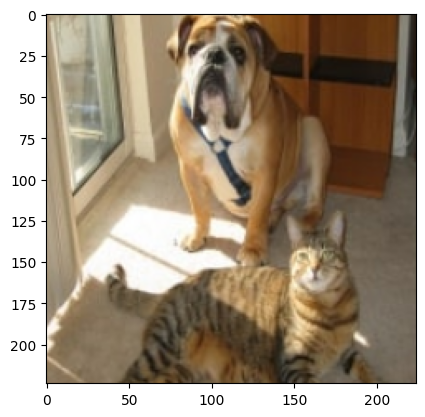

In [14]:
plt.imshow(torch_to_image(x,data_mean,data_std))

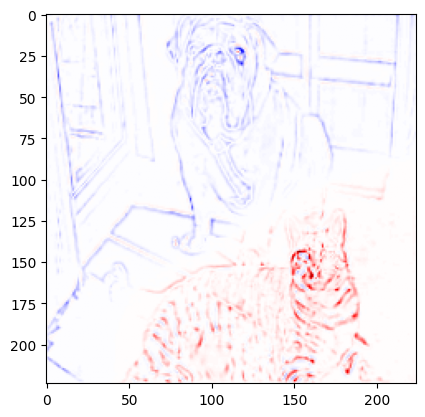

In [19]:
model_org = vgg16(pretrained=True,name='vgg16').to(device)
model_org = model_org.eval()
infer_pkg = InferencePkg()
infer_pkg.device = device
_ = model_org(x,infer_pkg)
y = torch.zeros_like(_)
idx = 281
simmap = model_org.get_pixel_cont(x,idx,infer_pkg,lambda x:x-x.mean()).squeeze().detach().cpu()
out = render.hm_to_rgb(simmap.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)

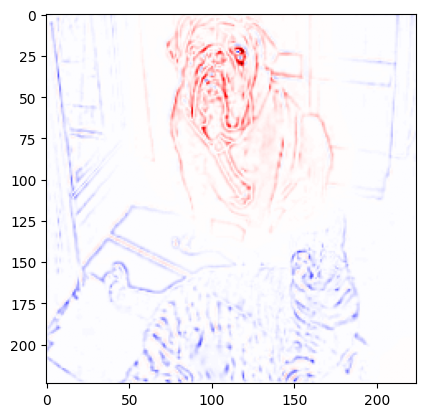

In [20]:
model_org = vgg16(pretrained=True,name='vgg16').to(device)
model_org = model_org.eval()
infer_pkg = InferencePkg()
infer_pkg.device = device
_ = model_org(x,infer_pkg)
y = torch.zeros_like(_)
idx = 243
simmap = model_org.get_pixel_cont(x,idx,infer_pkg,lambda x:x-x.mean()).squeeze().detach().cpu()
out = render.hm_to_rgb(simmap.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)

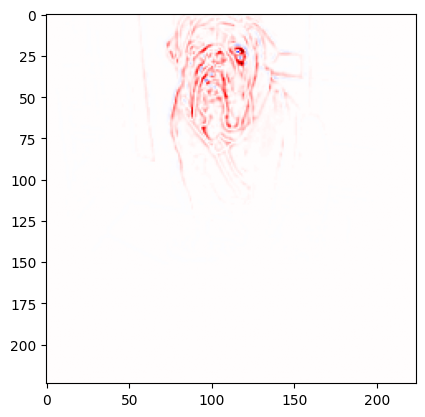

In [22]:
# show ERF
extern_simmap = torch.zeros_like(infer_pkg.simmaps['vgg16.features.29']).to(device)
extern_simmap[0,3,6] = 1
target_layer_name = 'vgg16.features.29'
erf = model_org.get_ERF(x,extern_simmap,infer_pkg,target_layer_name=target_layer_name)
out = render.hm_to_rgb(erf.squeeze().cpu().detach().numpy(), scaling=1, sigma=1, cmap='seismic')
plt.imshow(out)
plt.imsave('ERF_(5,5).png',out)